In [1]:
#performing cross-validation

In [ ]:
#assumptions in logistic regression

#they are linear in nature in log odds
#no multicollinearity(there is no correlation between various parameters)
#

In [2]:
#it is a technique for assessing how the statistical analysis generalises to an independent data set.
#it is a technique for evaluating machine learning models by training several models on subsets of the available input data
#evaluating them on the complementary subset of the data

In [ ]:
#if different split for training anad testing changes the acuuracy chnages
#in order to avoid this we perform cross validation
#there are different types of cross validation
#leave one out cross validation(out of 1000)(take one as test reamming as training )#disadvantsge of leave one cross out
#k-fold cross valiadation(if 1000 records k=5 1000/5 = 200 will be )
#A cost function is a way of telling how far away the model predictions are from perfectly describing the data; that is to say, the larger the errors between the model predictions and the actual data, then the larger the "cost" returned by the cost function.

In [ ]:
#in logistic regression cost function is the lo-loss function
#gradient decsnt to find the optimal paramters
#gradient descent is the optimization algorithm which is used to minimize the cost function(to tell how far the prediction is from the actual prediction)
#this is done by selecting the values which will reduce the cost function
#to find the set of pararmeters that results in the least cost
#costs are higher for the worst predictions
#this is done aurtomatically by the fit method
#our task is to find the best set of pararmeters which minimizes the cost function(coefficient and intercept)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [3]:
# Create features list
features = df[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']]
features

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,3,1,39,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
26660,150000,3,2,43,-1,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
26661,30000,2,2,37,4,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
26662,80000,3,1,41,1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features.values, df['default payment next month'].values,test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [5]:
#in order to decrease the overfitting we have come up with the cross_validation

In [11]:
#instantiating the minmaxscaler to scale the data(from sklearn.preprocessing)
#it scales each feature to the given range
#between 0 and 1
#it will tranform and display the data between 0 and 1
min_max_sc = MinMaxScaler()

In [12]:
#Next, instantiate a logistic regression model with the saga solver, L1 penalty, and set max_iter to 1,000 as we want the solver to have enough iterations to find a good solution.
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [13]:
lr

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [14]:
#solver tells about the algorithm to be used in the optimization problem
#liblinear(it is used for the small datasets)
#saga are faster for the large data sets
#penalty sepcify the norm used in the penalization
#Next, import the Pipeline class and create a Pipeline with the scaler and the logistic regression model, using the names 'scaler' and 'model' for the steps, respectively.

In [15]:
#pipeline is to assemble several steps that can be cross-validated together while setting different parameters
#in steps we give the tuple with operation that has to be performed and the variable on which the function has to be applied
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

In [16]:
#Now, use the get_params method to view the parameters from each stage of the pipeline.

In [17]:
# Use `get_params`
#get_params is used to get the values of the parameters in each case that is in scaler and the model
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [18]:
# View what `model__C` is set to currently
#c paramter default has value 1.0 inverse of regularization strength
#regularization is applying penalty to increase the magnitude of parameters values in order to reduce the overfitting
#to view the value of the particular parameter
scale_lr_pipeline.get_params()['model__C']


1.0

In [19]:
# Change `model__C` to 2
scale_lr_pipeline.set_params(model__C=2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [16]:
#Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.

In [17]:
#Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].

In [20]:
#creating  the c_vals value on which cross validation
#because the data in data set is large and it woyld consume a lot of time
C_val_exponents = np.linspace(2,-3,6)
C_vals = np.float(10)**C_val_exponents
C_vals

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [21]:
#stratefied  kfold aims that each strata has equal contribution of class 
n_folds = 4
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)

In [22]:
#Next, make a new version of the cross_val_C_search function, called cross_val_C_search_pipe. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the C value using set_params(model__C = <value you want to test>) on the pipeline, replacing the model with the pipeline for the fit and predict_proba methods, and accessing the C value using pipeline.get_params()['model__C'] for the printed status update.

In [23]:
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        #pipeline.C = C_vals[c_val_counter]
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]
            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)
            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
            #Increment the fold counter
            fold_counter += 1
            #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [24]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)
cv_train_roc_auc

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


array([[0.72330792, 0.72310045, 0.72122706, 0.71848248, 0.71964417,
        0.5       ],
       [0.72426246, 0.7240813 , 0.72246371, 0.71908685, 0.71897057,
        0.5       ],
       [0.71860906, 0.71841986, 0.71689297, 0.71569096, 0.71640856,
        0.5       ],
       [0.71331723, 0.71310104, 0.71146609, 0.7084636 , 0.71077436,
        0.5       ]])

In [25]:
#Plot the average training and testing ROC AUC across folds, for each np.log(C_vals) value.

Text(0.5, 1.0, 'Cross validation')

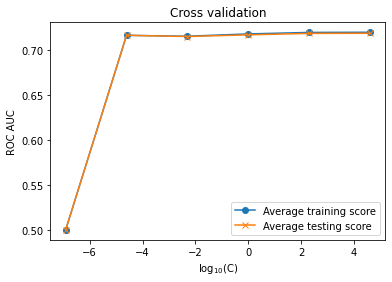

In [26]:
plt.plot(np.log(C_vals), np.mean(cv_train_roc_auc, axis=0), '-o',label='Average training score')
plt.plot(np.log(C_vals), np.mean(cv_test_roc_auc, axis=0), '-x',label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation')

In [27]:
#Up next, create interaction features for the case study data using scikit-learn's PolynomialFeatures. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.

In [28]:
#polynomial features  this function gives a new feature matrix consisting of all the polynomial distributionsof 
#feature with degree less than or equal to 2
#example [a,b] into [1,a,b,a^2,b^2]
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#trans = PolynomialFeatures(degree=3)
#to find the polynomail features of features
data = make_interactions.fit_transform(features)
data.shape
# convert the array back to a dataframe
#dataset = DataFrame(data)
#dataset

(26664, 153)

In [29]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data, df['default payment next month'].values, test_size=0.2, random_state=24)

In [30]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
cv_train_roc_auc1, cv_test_roc_auc1, cv_test_roc1 = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train_new, y_train_new)

/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 100.0


/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 10.0


/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation')

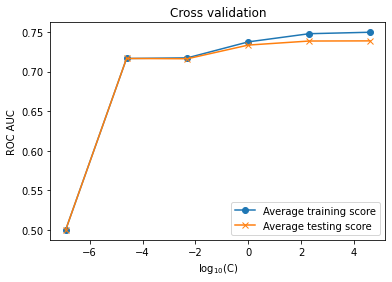

In [31]:
## Plot the average training and testing ROC AUC across folds, for each C value.
plt.plot(np.log(C_vals), np.mean(cv_train_roc_auc1, axis=0), '-o',label='Average training score')
plt.plot(np.log(C_vals), np.mean(cv_test_roc_auc1, axis=0), '-x',label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation')